## Results Analysis

This is the notebook which extract the results. During training, we saved the results in the **models/** folder. We load and extract the f1 score from the save text files results. 

In [3]:
!pip install seaborn

     |████████████████████████████████| 292 kB 20.6 MB/s eta 0:00:01
     |████████████████████████████████| 11.5 MB 15.9 MB/s eta 0:00:01


In [11]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [12]:
models_path = '../models/'
images_path = '../images'

if not os.path.exists(images_path):
    os.makedirs(images_path, exist_ok=True)

In [13]:
models = [
    "bert_en",
    "mbert",
    "mbert_10",
    "roberta_en"
]

labels = [
    "BERT",
    "mBERT",
    "RoBERTa",
    "mBERT10"
]

langs = ["kin", "pcm", "swa"]

The next block is reponsible for loading this results from text file.

In [14]:
results = {}

for model in models:
    lang_results = {}
    for lang in langs:
        caps_results = []
        for cap in range(1, 11):
            with open(os.path.join(models_path, model, lang, f"cap-{cap}", "eval_results.txt"), 'r') as f:
                caps_results.append(float(f.readlines()[0].split(' ')[-1][:-1]))
        lang_results[lang] = caps_results
    results[model] = lang_results

We then use these results to display the evolution of the models' performances across different *Entity Label Cap* with respect to each languages.

### Kinyarwanda (PCM)

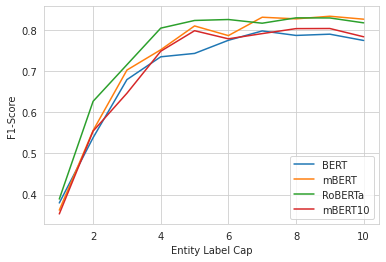

In [15]:
lang = "kin"

for idx in range(len(models)):
    ax = sns.lineplot(x=range(1, 11), 
                      y=results[models[idx]][lang], 
                      label=labels[idx],)
    ax.set_xlabel('Entity Label Cap')
    ax.set_ylabel('F1-Score')
    
plt.savefig(os.path.join(images_path, f"{lang}_models_plot.png"))

### Nigerian Pidgin (PCM)

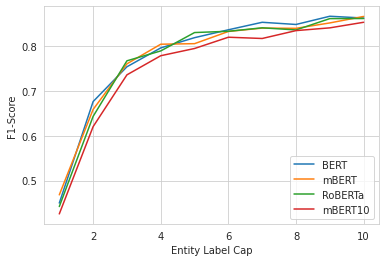

In [16]:
lang = "pcm"

for idx in range(len(models)):
    ax = sns.lineplot(x=range(1, 11), 
                      y=results[models[idx]][lang], 
                      label=labels[idx],)
    ax.set_xlabel('Entity Label Cap')
    ax.set_ylabel('F1-Score')
    
plt.savefig(os.path.join(images_path, f"{lang}_models_plot.png"))

### Swahili (SWA)

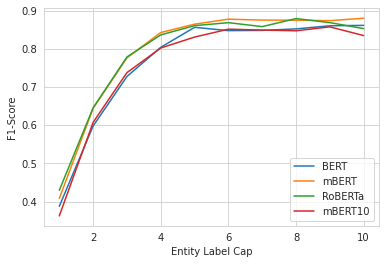

In [17]:
lang = "swa"

for idx in range(len(models)):
    ax = sns.lineplot(x=range(1, 11), 
                      y=results[models[idx]][lang], 
                      label=labels[idx],)
    ax.set_xlabel('Entity Label Cap')
    ax.set_ylabel('F1-Score')

plt.savefig(os.path.join(images_path, f"{lang}_models_plot.png"))